<a href="https://colab.research.google.com/github/lucasnbd/1TSCG-DbSuporte/blob/main/Aula_8_Regress%C3%A3o_Log%C3%ADstica_Exerc%C3%ADcio_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exemplo simples de regressão logística
# A assertividade dele é maior
# Ensinar um outro método pra verificar a validade/força da Reg Logit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDS/Aula 7/framingham.csv')
df.shape

(4238, 16)

In [ ]:
df1 = df.dropna()
df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:

X = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
Y = 'TenYearCHD'

# default para train_test_split é 75% para treino e 25% para teste
X_train, X_test, Y_train, Y_test = train_test_split(df1[X], df1[Y], test_size=0.5)

print(X_train.shape)
print(X_test.shape)


(1828, 15)
(1828, 15)


0.8539387308533917
              precision    recall  f1-score   support

           0     0.8615    0.9871    0.9200      1556
           1     0.5556    0.0919    0.1577       272

    accuracy                         0.8539      1828
   macro avg     0.7085    0.5395    0.5389      1828
weighted avg     0.8160    0.8539    0.8066      1828



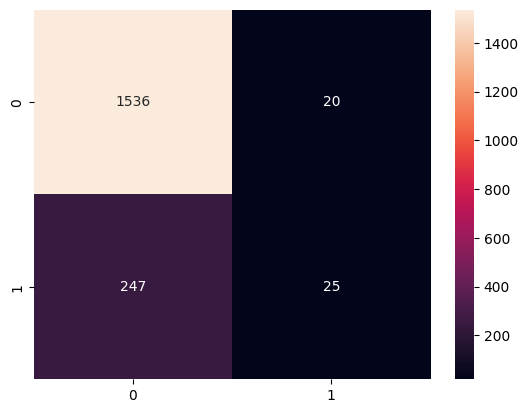

In [ ]:
classificador = LogisticRegression(max_iter=3000)
classificador.fit(X_train, Y_train)

# Tenho Y_test e terei o Y_previsto
# Para verificar a eficácia do modelo, basta comparar o Y previsto com o Y de teste

Y_predicted = classificador.predict(X_test)
matrix = confusion_matrix(Y_test, Y_predicted)

# NEGATIVO          FALSO NEGATIVO
# FALSO POSITIVO    POSITIVO

sns.heatmap(pd.DataFrame(matrix), annot=True, fmt='g')

train_accuracy = accuracy_score(Y_test, Y_predicted)
print(train_accuracy)
print(classification_report(Y_test, Y_predicted, digits=4))
